<a href="https://colab.research.google.com/github/Benned-H/Reading_List/blob/master/Notes/Hand_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Hand Segmentation Using Skin Color and Background Information
By Wei Wang, Jing Pan

This paper presents a new method for segmenting hands from the background of an image. Their method uses an adaptive skin color model with three steps:
1. Capture pixel values of hand and background
2. Propose Gaussian models on the color space
3. Segment the image using various models, intersect the results

Results were better than other skin-color-only models.

## 1. Introduction

Various applications make accurate hand quite important, and segmentation is a crucial first step in this process. Because human skin is generally within a limited range of hues, color-based hand recognition has been investigated for decades. The process depends on two choices: the **color space** and the **model of distribution** for skin colors. Prior work used a variety of techniques and spaces, including:
* Color spaces: Normalized RGB, CIE, XYZ, HSV, HSI, YCbCr
* Gaussian model for distributions
* Edge detection
* Varied chrominance spaces
* Skin/edge information in various spaces

## 2. Color Space and Gaussian model

Their method was primarily concerned with the use of background information to help segmentation. Thus they only used the normalized RGB and YCbCr color spaces and a single Gaussian model.

**Normalized RGB**   
RGB is a convenient color model widely used for processing image data. Unfortunately, the RGB color space is not robust because it cannot define the same color in different conditions or illumination. Normalized RGB was proposed to help this problem, and indeed gets better performance under different light conditions *only in uniform illumination*. Normalized RGB can be calculated as:

$R=\frac{R}{R+G+B}$; $G=\frac{G}{R+G+B}$; $B=\frac{B}{R+G+B}$.

**YCbCr**   
YCbCr is considered to be better for our purposes than RGB. The clustering is better, it's easy to calculate, and has far less overlap between skin and non-skin tones in various illumination conditions. YCbCr separates out a luminance signal (Y) and two chrominance components (Cb and Cr). We can discard signal Y to improve performance over various lighting conditions. The transform from RGB to YCbCr is simple:

$
\begin{bmatrix}
Y \\ Cb \\ Cr
\end{bmatrix}=
\begin{bmatrix}
0.2568 & 0.5041 & 0.0979 \\
-0.1482 & -0.2910 & 0.4392 \\
0.4392 & -0.3678 & -0.0714
\end{bmatrix}
\begin{bmatrix}
R \\ G \\ B
\end{bmatrix}+
\begin{bmatrix}
16 \\ 128 \\ 128
\end{bmatrix}
$

## Gaussian Mixture Model - [Brilliant](https://brilliant.org/wiki/gaussian-mixture-model/#)

Gaussian mixture models (GMMs) are a probabilistic model for representing normally distributed subpopulations within an overall population (a normal distribution has mean = median = mode, and symmetry over its center). Mixture models don't need to know which subpopulation each data point belongs to, which make them somewhat unsupervised learning (e.g. human height data would have two normal distributions between the sexes, which a GMM could capture).

**Motivation**   
We might want to try modeling data with a GMM if it appears to have more than one 'peak' distribution. Unimodal (one 'peak') models would give a poor fit in such a case, and yet GMMs retain the computational benefits of a single Gaussian model.

**To be continued upon additional probability background...**

## 2 cont.

The properties of skin color can be modeled using a Gaussian distribution, which has the formula:   
$f(x)=\frac{1}{\sqrt{2\pi \sigma ^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$, where $\mu$ is the mean value of the samples and $\sigma$ is the variance value.

Using this model for skin color is a process of matching each pixel in the image. If matched, we consider the pixel as a skin pixel, and if not we consider it background. The two parameters ($\mu$ and $\sigma$) decide the structure of our Gaussian model, and need to be learned. A common method for this is **offline training** on thousands of images, but these authors use an adaptive skin color model, which uses the center of the hand skin to calculate and constantly update the parameters of the model. This **online** model seems to work better in different illuminations. Because this paper doesn't explain that model, I'll read through the source of this idea:

# 2. A New Method for Hand Segmentation Using Free-Form Skin Color Model
By Ahmad Yahya Dawod, Junaidi Abdullah, and Md.Jahangir Alam

Segmentation remains difficult; this paper proposes a new method using a free-form skin color model. The pixel values of the hand are represented in the YbCbCr color space, and the CbCr space is mapped to a CbCr plane. To cluster the region of skin color on this plane, edge detection is used (as opposed to an ellipse) to construct a free-form skin color model.

## I. Introduction

The goal of hand segmentation is to detect the position and orientation of hands in an image; the aim of skin color pixel classification is to determine if a color pixel is a skin color or non-skin color. There are several techniques used to model the skin color:
* An elliptical boundary model which fits an ellipse on the CbCr plane. The ellipse ends up including non-skin pixel colors, unfortunately.
* Coarse model - Fixed straight lines are used as boundaries to a coarse region, but again this includes non-skin pixels.
* Estimate the boundary by constructing bilinear and bicubic boxes around the CbCr pixel cluster. Same issue.

This paper proposes a new method that uses a free-form boundary which models the skin color depending on the person and minimizes the inclusion of non-skin pixels.

## II. Suggested Method

Their method consists of four modules:
1. Image acquisition (skin region cropping)
2. Mapping (CbCr color space mapping)
3. Morphology (erosion & dilation)
4. Boundary creation (detecting edges)

**Image Acquisition**   
Because different people have different skin tones, the authors believe (and I agree) that we shouldn't just define some general range for skin tones. Thus we need to crop a skin image of the person using the system to develop a free-form model specific to them. As has been mentioned, choosing the right color space is the first step we need to tackle. Long story short, we choose YCbCr for the previously written reasons (taken from here, by the way). Skin image cropping just crops the image so we only see a patch of the user's skin as the cropped result. We can then form a cluster in our color space with this example.

**CbCr Color Space Mapping**   
They observed that the intensity value Y of YCbCr has little influence on the color distribution. On the Cb and Cr plane, we can generate a map where white (255) points are skin pixels and black (0) are non-skin. The resulting 255x255 map is the range of skin color present in the cropped image.

**Morphology**   
This stage uses image processing to create a cleaner single free-form shape. Two operations are used: Dilation adds pixels to fill in missing pixels in the white cluster and erosion removes extra pixels not belonging to the white cluster. Both help our resulting segmentation, and are applied in the order of dilation, erosion, and then edge point extraction.

**Boundary Creation**   
Here we determine the actual region which will define skin and non-skin color pixels. We consider the white cluster and apply an edge detection algorithm, for which there are a few different methods (gradient, laplacian). The **gradient method** detects the edge by looking for the maximum and minimum in the first derivative of the image, whereas the **laplacian method** searches for zero crossings in the second derivative of the image.

For gradient edge detection, given image function $f(x,y)$, the gradient magnitude $g(x,y)$ and direction $\theta(x,y)$ are computed as:   
$g(x,y)\cong \sqrt{\Delta x^2 + \Delta y^2}$ and $\theta(x,y)\cong a \tan(\frac{\Delta y}{\Delta x})$,   
where $\Delta x =f(x+n,y)-f(x-n,y)$ and $\Delta y =f(x,y+n)-f(x,y-n)$,   
where $n$ is a small integer.

They used the Sobel operator for the gradient method due to its fast speed, fine scale edge detection, and smoothing action. Once the edge has been detected, they arrive at the skin color cluster. Pixels with color in the cluster are skin, those not are classified as non-skin.

## III. Experimental Results

The authors also implemented a few morphological operations on the detected hand: fill holes in the segmented hand and also index all white regions in descending order by number of pixels. Only the white region with the most pixels is marked as white in the final result. In another example, a watch cuts the hand at the wrist, and with this knowledge the authors can include the top two white regions.

To validate their work, the authors estimated a **true positive rate** (TPR) and **false positive rate** (FPR). These were calculated as:   
$\text{TPR}=\frac{\text{TP}}{\text{TP}+\text{FN}}$, $\text{FPR}=\frac{\text{FP}}{\text{FP}+\text{TN}}$.

## Conclusion

This paper introduced a novel free-form skin color model in the YCbCr color space. Its most important contribution is the ability to accurately tailor a hand segmentation color space to a user, regardless of their skin color or the setting's illumination.

*--Done 6/23/2019--*

# Resuming 1

## 3. Proposed Method

Their model introduces a new technique based on mixing a background model and a skin color model. A flowchart of the process:   
![Flowchart](https://i.imgur.com/m7YG08D.png)

A prerequisite of the process is that we've detected a hand and have a region of interest (ROI) that's a cropped region fully containing the hand and some background as well. In this ROI, we crop a region $P_0$ that contains *only skin color* (in the center of the hand, probably), as we needed in the previously read paper. We also crop $N$ regions $(P_1, P_2, ... ,P_N)$ containing random samples of background color. These may include some skin color at this point, no problem. We build six directions of the model to best ensure an accurate skin color and background color sampling.

We now want to check whether the background samples actually belong to the background. We calculate the mean ($M_i$) and variance value ($s_i$) of each cropped region to set up their Gaussian models. Each background crop is then used to segment the skin crop region with an automatic threshold interval $T_i$. Pixels in the skin crop region among $T_i$ are set to white (255) and others are set to black (0). If the proportion of the white parts exceeds some fixed threshold $S$, the corresponding background image is considered truth background and is accepted, otherwise it's discarded. To ensure a mostly-uniform background color, background crop regions with variance above some value $V_m$ are also dropped.

The skin crop regions and surviving background crop regions are used to segment the cropped image witht threshold $T_0$ and $T_1$, respectively. The segmentation results $(R_0,R_1,...,R_N)$ are intersected to get the final result. Their method used parameters $N=50$, $V_m=0.15$, $S=0.95$, and interval $T_i$ for the background crop region depended on $s_i$ to guarantee that 90% of the pixels in the crop region were in its Gaussian distribution. The original images were 320x240 and the cropped images varied in size.

## 4. Experimental Results

Their method worked far better than the traditional only-skin-based method. In comparing different values for $N$, increasing the value helps the method up to some point. When $N$ exceeds about 40, improvements slow. Perhaps $N$ only needs to be large enough that all useful background information is obtained? A smaller $N$ is preferable for images with simple backgrounds, but no description of how to measure this is given.

The authors evaluate the accuracy rate (AR) using the formula:   
$\text{AR}=\frac{\text{AS}\cap \text{AL}}{\text{AS}\cup \text{AL}}$, where $\text{AS}$ is the area of the segmented hand and $\text{AL}$ is the area of the labeled hand in the image. Thus $\text{AR}<1$ and a higher AR indicates a more accurate segmentation. Their method reaches an AR of 90.36% on a difficult image while the online model reached 69.30%.

## 5. Conclusions

This paper introduced a hand segmentation method which used background information samples to improve accuracy. They used only a Gaussian model to characterize skin color in the RGB and YCbCr color spaces. Future work might include a GMM or free-skin color model to make further improvements.   
*--Done 6/24/2019--*

# 3. Dilation
By R. Fisher, S. Perkins, A. Walker, and E. Wolfart

## Introduction

Dilation is one of the two basic operators of **mathematical morphology**, which concerns the theory of processing geometrical structures (typically applied to digital images). It's typically applied to binary images, and the basic effect is to gradually enlarge the boundaries of the **foreground** (white) pixels in the image. Thus the areas of white grow in size and holes in those regions shrink.

## How It Works

Dilation uses two inputs: the image to be dilated, and a **structuring element**. The structuring element (AKA kernel) is a set of coordinate points that determines the precise result of the dilation operation. The mathematical definition:   

*Def*: Suppose $X$ is the set of Euclidean coordinates corresponding to the input binary image, and $K$ is the set of coordinates for the structuring element. Let $Kx$ denote the translation of $K$ so that its origin is at $x \in X$. Then the dilation of $X$ by $K$ is simply the set of all points $x$ s.t. the intersection of $Kx$ with $X$ is non-empty.   
*In my words*: For our result $Y \subseteq X$, when we put kernel $K$ at each $y \in Y$, $K$ will intersect with at least one $x \in X$. I hope this is a correct understanding.

E.g. Let's say our structuring element is a 3x3 square, with origin at its center. We'll represent foreground pixels with 1's and background as 0's.

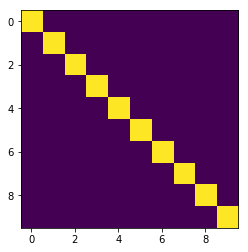

In [6]:
#  Let's say our image is the following 10x10 pattern:
import numpy as np
from matplotlib import pyplot as plt

image = np.array([[1,0,0,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0,0,0],
                [0,0,0,1,0,0,0,0,0,0],
                [0,0,0,0,1,0,0,0,0,0],
                [0,0,0,0,0,1,0,0,0,0],
                [0,0,0,0,0,0,1,0,0,0],
                [0,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,0,0,1]
               ])
plt.imshow(image)
plt.show()

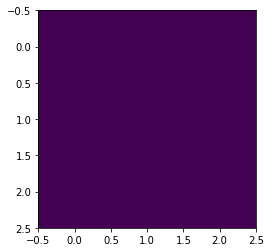

In [9]:
# Our kernel:
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
plt.imshow(kernel)
plt.show()

In order to compute the dilation of this binary image, we consider each background pixel of the image in turn. We then superimpose the kernel over each of these **input pixels**. If *at least one* of the kernel's pixels overlaps with a foreground pixel, the input pixel is set to the foreground (probably do this *after* we first consider each background pixel). Thus if all pixels were set to background when we start, nothing will change.

In [0]:
def dilate(image, kernel, kernel_origin):
  # Dilate the given image using the given kernel.
  for r,row in enumerate(image):
    for c,col in r:
      

In [0]:
dilate(image,1,1)

In [10]:
for r in image:
  print(r)

[1 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 1]


# To Read/Learn:

* https://wolfcrow.com/understanding-luminance-and-chrominance/
* https://homepages.inf.ed.ac.uk/rbf/HIPR2/dilate.htm
* https://homepages.inf.ed.ac.uk/rbf/HIPR2/erode.htm
* Sobel operator?

Last revised 6/25/2019.